In [1]:
%run ../../../utils/commonImports.py
%run ../../../utils/tradingImports.py
%matplotlib inline

# Properties

In [2]:
dataRoot = 'D:\\Dropbox\\My work\\krypl-project\\dataLabeled'
featuresRoot = 'D:\\Dropbox\\My work\\krypl-project\\dataFeatures'

fileName = 'return-01-loss-max-01-within-day.tsv'
fileNameDropedNA = 'return-01-loss-max-01-within-day-droped-na.tsv'
featuresFile = f'{featuresRoot}\\{fileName}'
featuresFileDropedNA = f'{featuresRoot}\\{fileNameDropedNA}'

In [36]:
MAX_TRAIN_DATE = "2017-09-15"

In [31]:
file = f'{dataRoot}\\{fileName}'
data = pd.read_csv(file, sep='\t')
featured = data.copy()\
    .query("date > '2016-02-01'")\
    .sort_values('date')\
    .reset_index()\
    .drop('index', axis=1)

# Two windows return

Let $A$ be the time series of values, $t$ current index and and $w_1$ and $w_2$ window sizes. We then define windows $W_1$ and $W_2$ on time series $A$ as follows:

* $W_1 = A[t-w_2-w1:t-w2]$
* $W_2 = A[t-w_2:t]$

With such windows we can calculate windows return $R_t$ as:

$ R^{w1,w2}_t = \frac{mean(W_2)}{mean(W_1)} - 1 $

In [21]:
def two_windows_return(arr, w1, w2, t, f=np.mean):
    if t - w2 - w1 < 0:
        return np.nan
    
    W1 = arr[t-w2-w1:t-w2]
    W2 = arr[t-w2:t]
    return (f(W2) / f(W1)) - 1

def two_windows_return_col(arr, w1, w2, f=np.mean):
    result = []
    for t in range(len(arr)):
        result.append(two_windows_return(arr, w1, w2, t, f))
    return result

l = [0, 1, 2, 3, 4, 5, 6, 7]
assert two_windows_return(l, 3, 2, 7) == ((5.5 / 3) - 1)

In [30]:
import time
def iterate_over_window_sizes(featured_orig, arr, sizes, hour=12):
    featured = featured_orig.copy()
    hour = 12
    for w1 in sizes:
        for w2 in sizes:
            print(f"[{w1}] [{w2}]", end='')
            start_time = time.time()
            featured[f'twoWindowsReturn_{w1}_{w2}'] = two_windows_return_col(arr, w1, w2)
            print('........................... %.2f sec' % (time.time() - start_time))
    return featured

# Return of close

In [23]:
sizes = [i*hour for i in range(1, 25, 6)]
arr = featured['close'].copy().values
featured = iterate_over_window_sizes(featured, arr, sizes)

[12] [12]........................... 7.48 sec
[12] [84]........................... 7.31 sec
[12] [156]........................... 7.37 sec
[12] [228]........................... 7.45 sec
[84] [12]........................... 7.35 sec
[84] [84]........................... 7.44 sec
[84] [156]........................... 7.40 sec
[84] [228]........................... 7.39 sec
[156] [12]........................... 7.34 sec
[156] [84]........................... 7.42 sec
[156] [156]........................... 7.39 sec
[156] [228]........................... 7.42 sec
[228] [12]........................... 7.81 sec
[228] [84]........................... 7.78 sec
[228] [156]........................... 7.48 sec
[228] [228]........................... 7.47 sec


In [25]:
featured.tail()

,timestamp,period,open,high,low,close,volume,quoteVolume,weightedAverage,date,...,twoWindowsReturn_84_156,twoWindowsReturn_84_228,twoWindowsReturn_156_12,twoWindowsReturn_156_84,twoWindowsReturn_156_156,twoWindowsReturn_156_228,twoWindowsReturn_228_12,twoWindowsReturn_228_84,twoWindowsReturn_228_156,twoWindowsReturn_228_228
260595,1537200000,5min,"6,262.5732","6,297.0000","6,261.3700","6,271.7090","270,698.0516",43.1399,"6,274.8847",2018-09-17 18:00:00,...,0.0080,0.0316,-0.0137,0.0015,0.0197,0.0291,-0.0101,0.0109,0.0222,0.0284
260596,1537201800,5min,"6,281.3373","6,288.7958","6,261.7439","6,261.7439","68,021.9392",10.8351,"6,277.9357",2018-09-17 18:30:00,...,0.0075,0.0316,-0.0165,0.0008,0.0194,0.0292,-0.0131,0.0103,0.0220,0.0284
260597,1537203600,5min,"6,265.7089","6,280.0000","6,261.3810","6,272.3441","173,722.7871",27.6974,"6,272.1613",2018-09-17 19:00:00,...,0.0070,0.0315,-0.0192,0.0001,0.0191,0.0291,-0.0160,0.0097,0.0218,0.0284
260598,1537205400,5min,"6,265.5379","6,289.0655","6,265.5200","6,287.4922","118,713.2179",18.8961,"6,282.4313",2018-09-17 19:30:00,...,0.0064,0.0315,-0.0218,-0.0006,0.0187,0.0291,-0.0188,0.0091,0.0215,0.0284
260599,1537207200,5min,"6,289.1695","6,316.6496","6,289.1695","6,308.0809","78,169.3516",12.3915,"6,308.3133",2018-09-17 20:00:00,...,0.0059,0.0314,-0.0241,-0.0013,0.0184,0.0291,-0.0213,0.0085,0.0212,0.0285


# Scatter matrix

In [63]:
def scatter_matrix(df, cols, step_size=4):
    sampled = df.query(f"date < '{MAX_TRAIN_DATE}'")
    sampled = sampled[cols+['label']].replace(np.inf, np.nan).dropna().sample(10**4)
    for i in range(0, len(cols), step_size):
        selected_cols = cols[i:i+4] + ['label']
        sns.pairplot(sampled[selected_cols], hue='label', hue_order=[0, 1], vars=selected_cols, plot_kws={'alpha': 0.3});

In [26]:
featured.columns

Index(['timestamp', 'period', 'open', 'high', 'low', 'close', 'volume',
       'quoteVolume', 'weightedAverage', 'date', 'maxReturn', 'tillMax',
       'minReturn', 'label', 'twoWindowsReturn_12_12',
       'twoWindowsReturn_12_84', 'twoWindowsReturn_12_156',
       'twoWindowsReturn_12_228', 'twoWindowsReturn_84_12',
       'twoWindowsReturn_84_84', 'twoWindowsReturn_84_156',
       'twoWindowsReturn_84_228', 'twoWindowsReturn_156_12',
       'twoWindowsReturn_156_84', 'twoWindowsReturn_156_156',
       'twoWindowsReturn_156_228', 'twoWindowsReturn_228_12',
       'twoWindowsReturn_228_84', 'twoWindowsReturn_228_156',
       'twoWindowsReturn_228_228'],
      dtype='object')

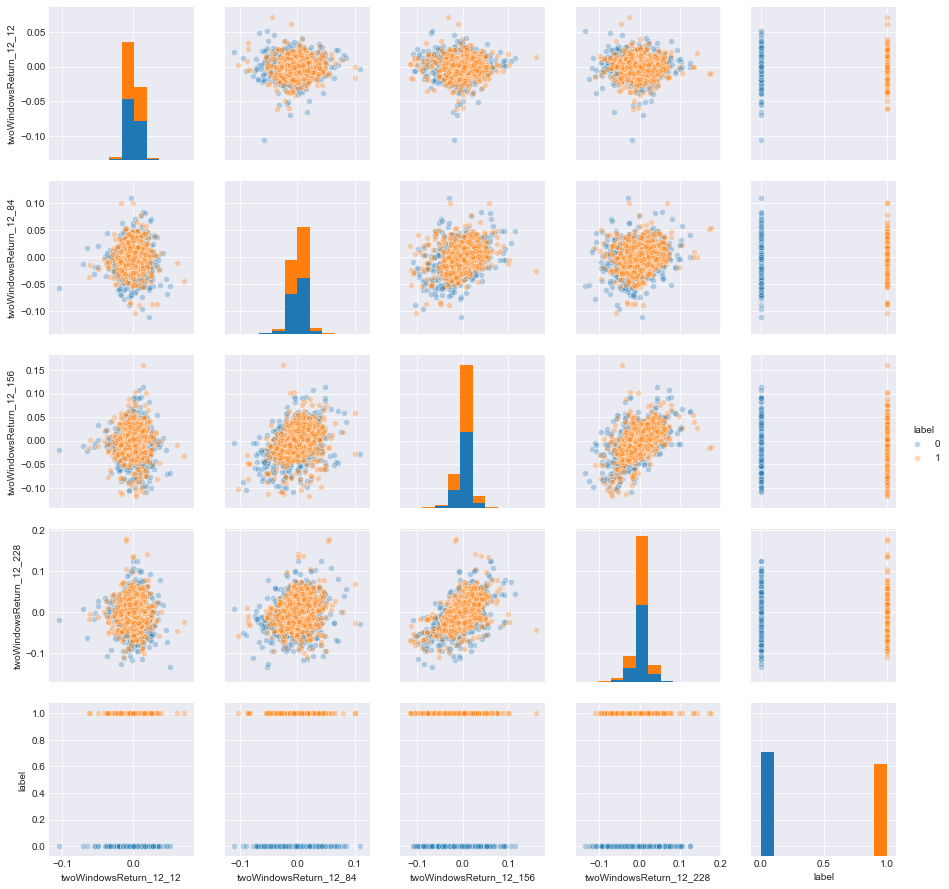

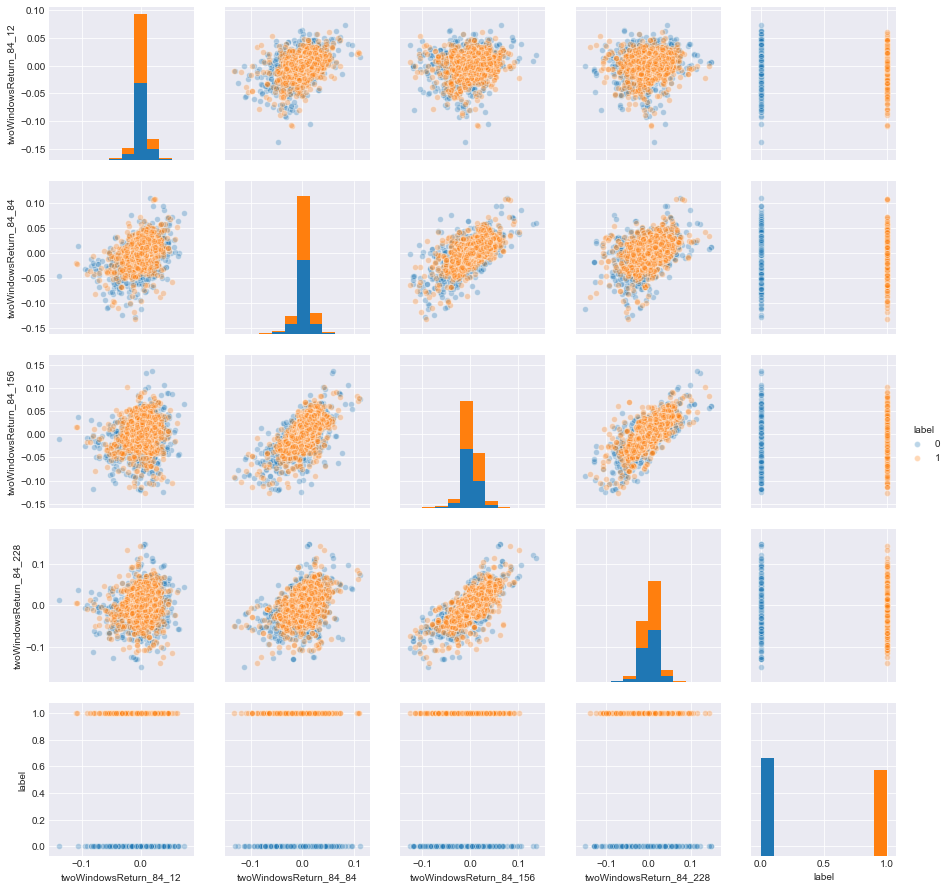

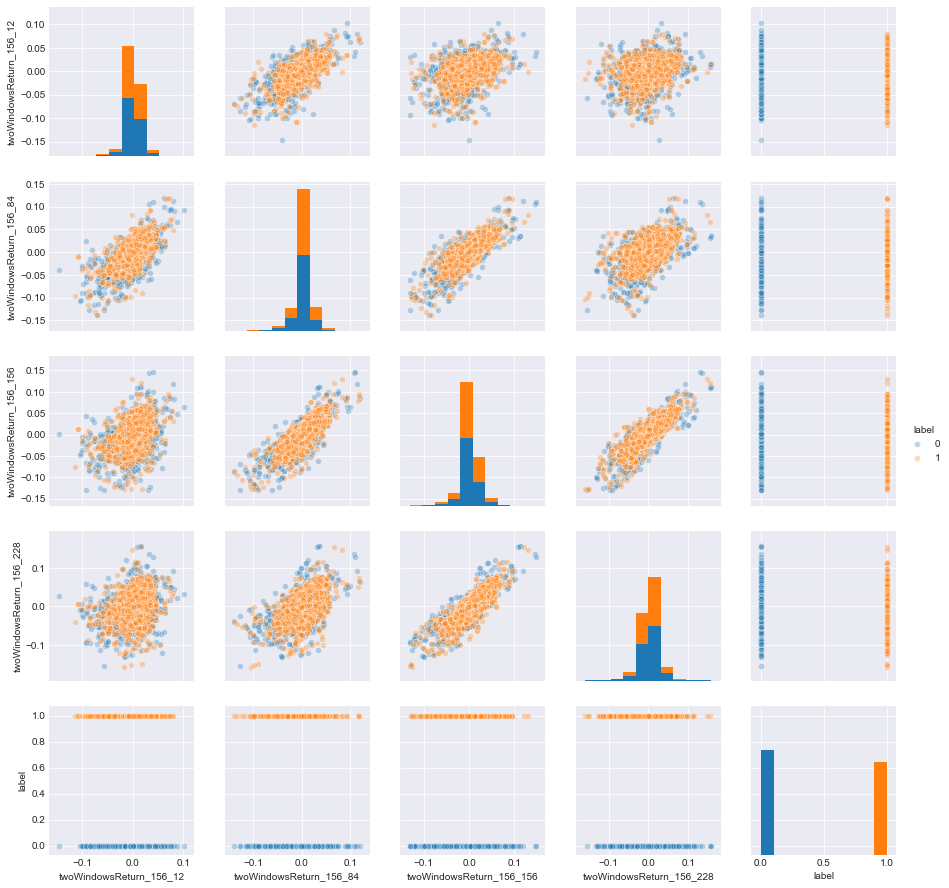

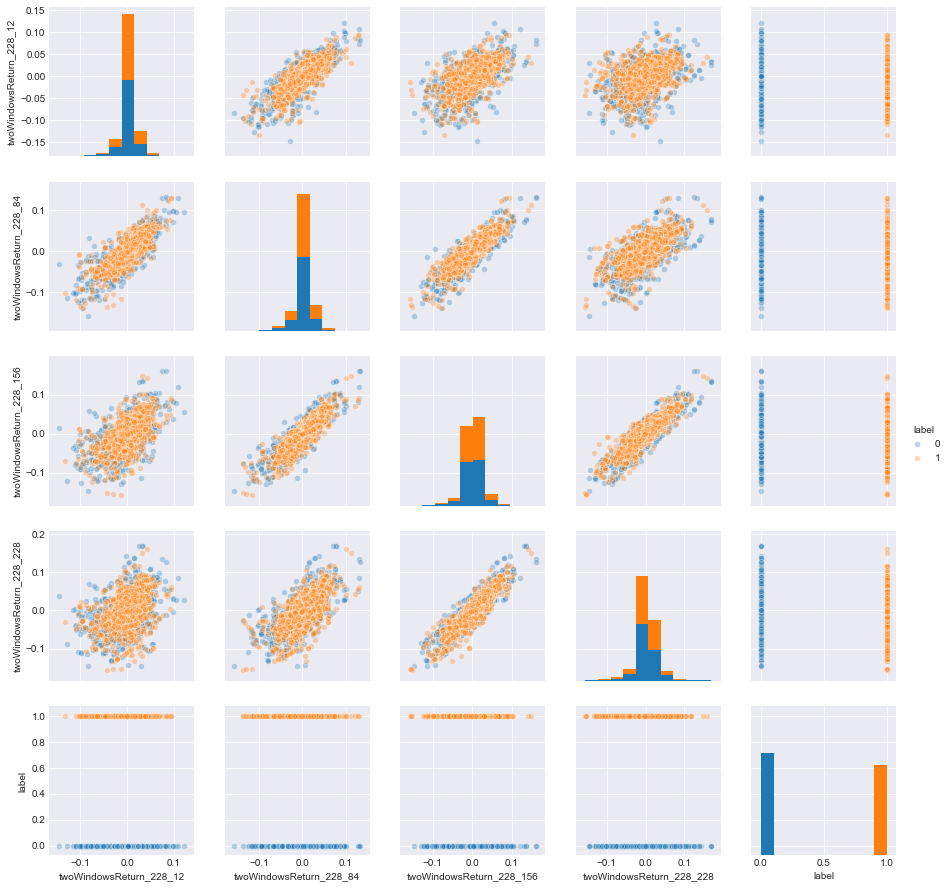

In [29]:
cols = ['twoWindowsReturn_12_12',
       'twoWindowsReturn_12_84', 'twoWindowsReturn_12_156',
       'twoWindowsReturn_12_228', 'twoWindowsReturn_84_12',
       'twoWindowsReturn_84_84', 'twoWindowsReturn_84_156',
       'twoWindowsReturn_84_228', 'twoWindowsReturn_156_12',
       'twoWindowsReturn_156_84', 'twoWindowsReturn_156_156',
       'twoWindowsReturn_156_228', 'twoWindowsReturn_228_12',
       'twoWindowsReturn_228_84', 'twoWindowsReturn_228_156',
       'twoWindowsReturn_228_228']
scatter_matrix(featured.query(f"date < '{MAX_TRAIN_DATE}'", cols)

# Return of volume

In [33]:
sizes = [i*hour for i in range(1, 25, 6)]
arr = featured['volume'].copy().values
featured = iterate_over_window_sizes(featured, arr, sizes)

[12] [12]

C:\Anaconda3\envs\crypto36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\Anaconda3\envs\crypto36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


........................... 10.34 sec
[12] [84]........................... 7.37 sec
[12] [156]........................... 8.05 sec
[12] [228]........................... 6.86 sec
[84] [12]........................... 7.40 sec
[84] [84]........................... 6.97 sec
[84] [156]........................... 7.03 sec
[84] [228]........................... 7.08 sec
[156] [12]........................... 7.28 sec
[156] [84]........................... 7.36 sec
[156] [156]........................... 7.76 sec
[156] [228]........................... 7.04 sec
[228] [12]........................... 7.09 sec
[228] [84]........................... 7.12 sec
[228] [156]........................... 7.10 sec
[228] [228]........................... 7.19 sec


In [35]:
featured.columns

Index(['timestamp', 'period', 'open', 'high', 'low', 'close', 'volume',
       'quoteVolume', 'weightedAverage', 'date', 'maxReturn', 'tillMax',
       'minReturn', 'label', 'twoWindowsReturn_12_12',
       'twoWindowsReturn_12_84', 'twoWindowsReturn_12_156',
       'twoWindowsReturn_12_228', 'twoWindowsReturn_84_12',
       'twoWindowsReturn_84_84', 'twoWindowsReturn_84_156',
       'twoWindowsReturn_84_228', 'twoWindowsReturn_156_12',
       'twoWindowsReturn_156_84', 'twoWindowsReturn_156_156',
       'twoWindowsReturn_156_228', 'twoWindowsReturn_228_12',
       'twoWindowsReturn_228_84', 'twoWindowsReturn_228_156',
       'twoWindowsReturn_228_228'],
      dtype='object')

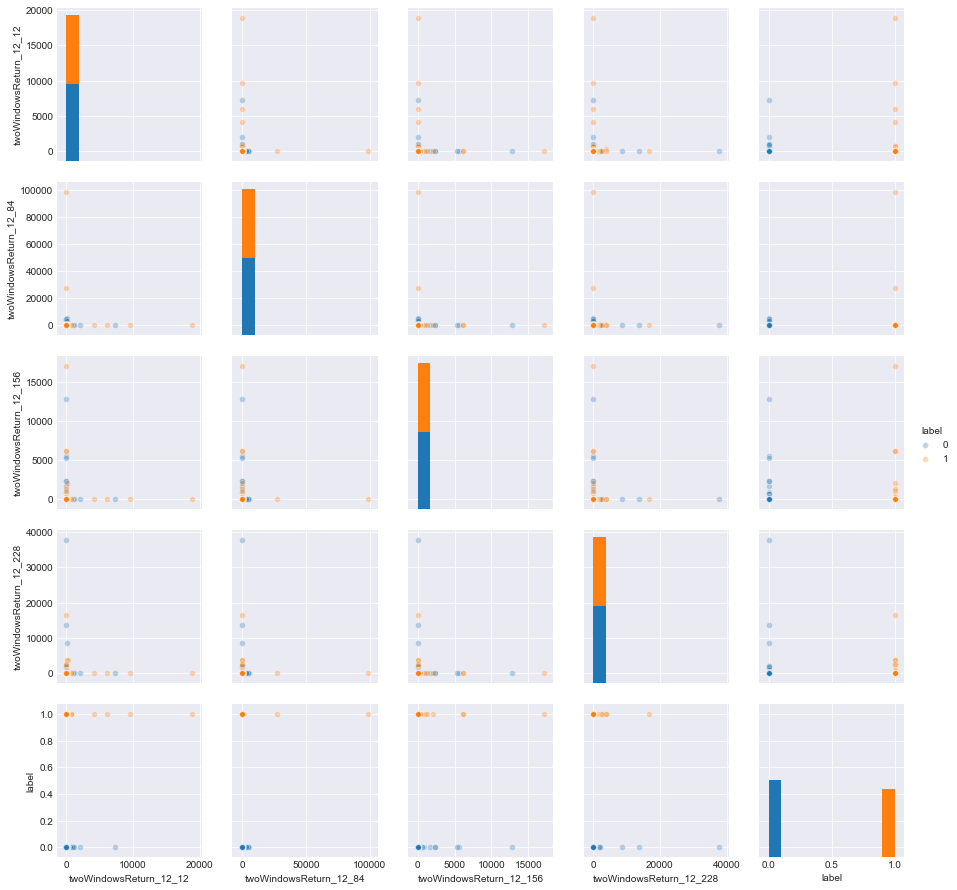

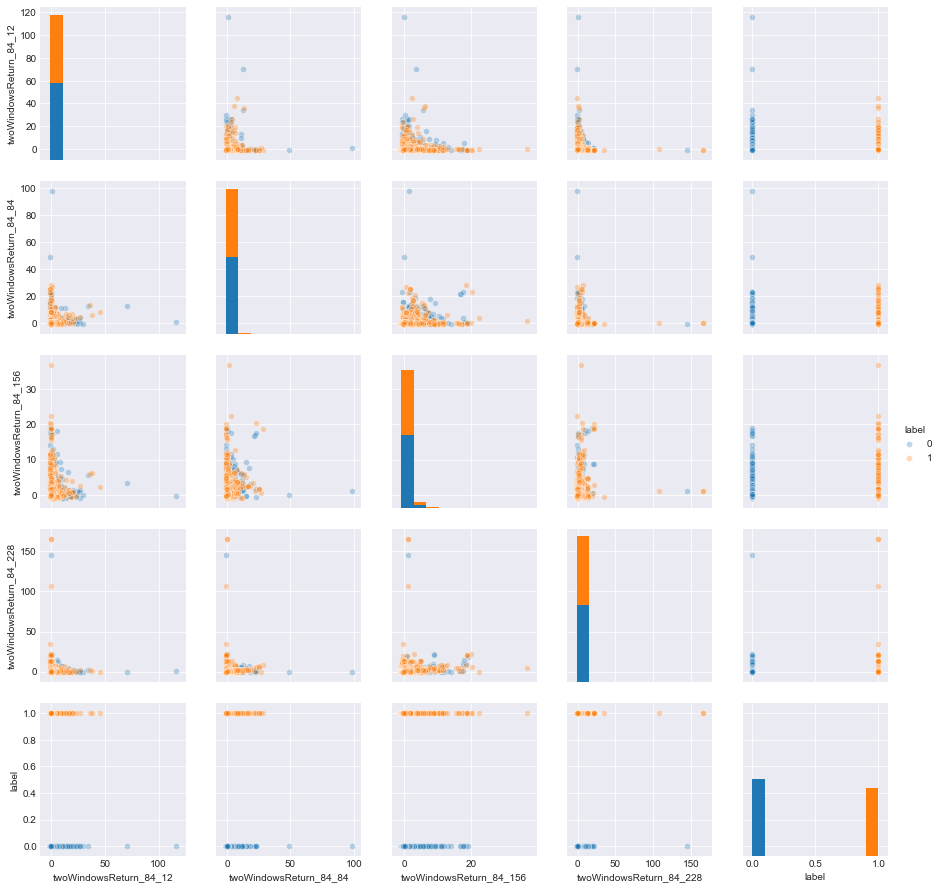

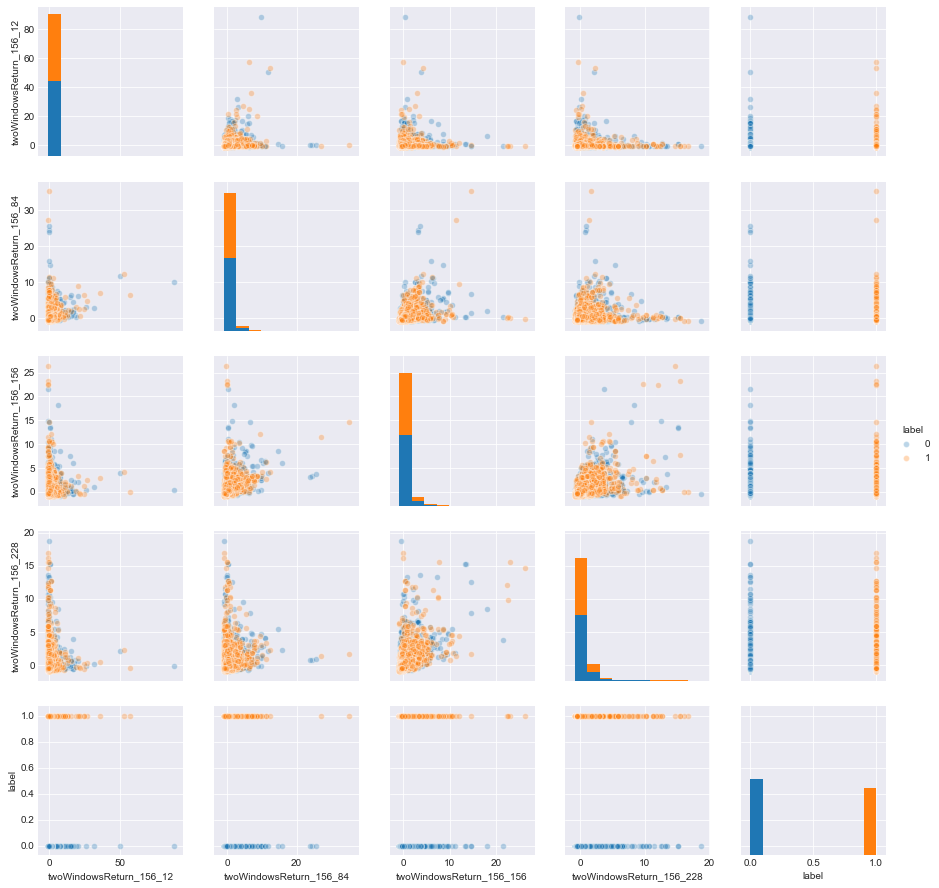

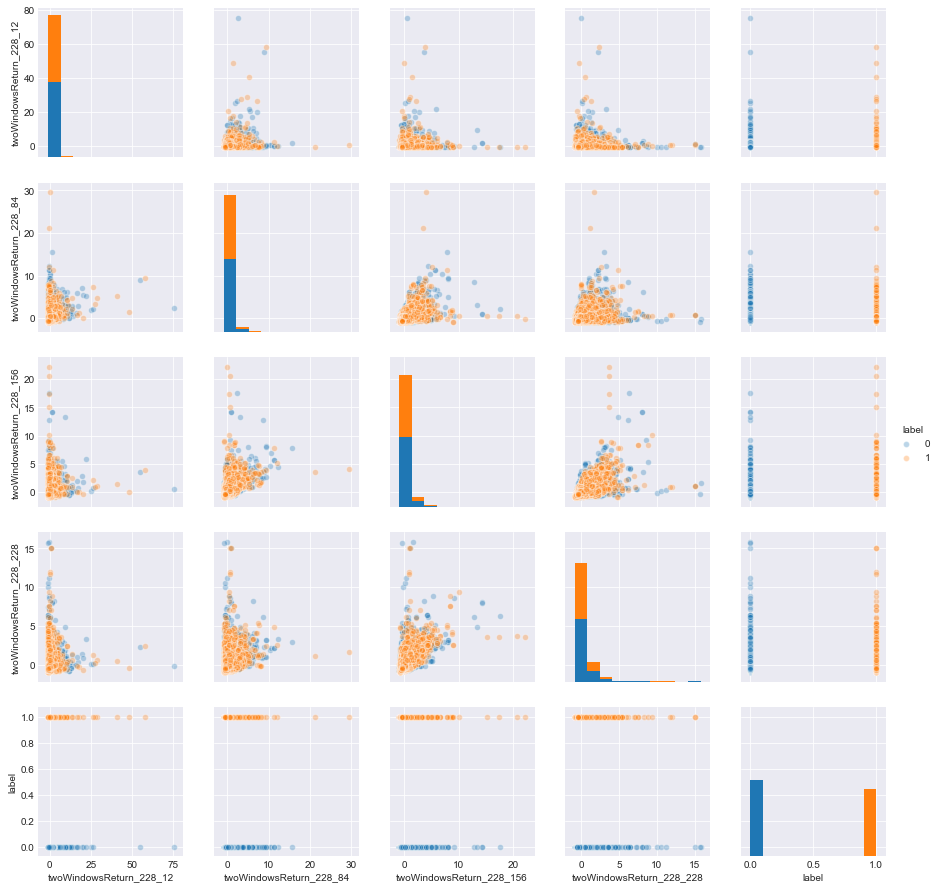

In [64]:
cols = ['twoWindowsReturn_12_12',
       'twoWindowsReturn_12_84', 'twoWindowsReturn_12_156',
       'twoWindowsReturn_12_228', 'twoWindowsReturn_84_12',
       'twoWindowsReturn_84_84', 'twoWindowsReturn_84_156',
       'twoWindowsReturn_84_228', 'twoWindowsReturn_156_12',
       'twoWindowsReturn_156_84', 'twoWindowsReturn_156_156',
       'twoWindowsReturn_156_228', 'twoWindowsReturn_228_12',
       'twoWindowsReturn_228_84', 'twoWindowsReturn_228_156',
       'twoWindowsReturn_228_228']
scatter_matrix(featured, cols)